# K means clustering on online sales data with 2 features for a better visualizaion purpose 

K-menas on shopping data ( we will choose only two columns for better visulazion )

In [1]:
cd downloads

[WinError 2] The system cannot find the file specified: 'downloads'
C:\Users\Deepu\Documents\machine_learning


In [2]:
pwd

'C:\\Users\\Deepu\\Documents\\machine_learning'

In [3]:
cd c:\\users\deepu\downloads


c:\users\deepu\downloads


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
demo = pd.read_csv('shopping_data.csv')

In [12]:
demo

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
demo.drop(['CustomerID','Genre','Age'], axis = 1,inplace = True)

In [8]:
demo

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


## Okay let's just build a simple K means clustering without doing much of feature engineerng and then we will do features engineering

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(demo)

KMeans(n_clusters=4)

In [43]:
# let's check the centers 
centers=kmeans.cluster_centers_
print(centers)

[[48.26       56.48      ]
 [86.53846154 82.12820513]
 [87.         18.63157895]
 [26.30434783 20.91304348]]


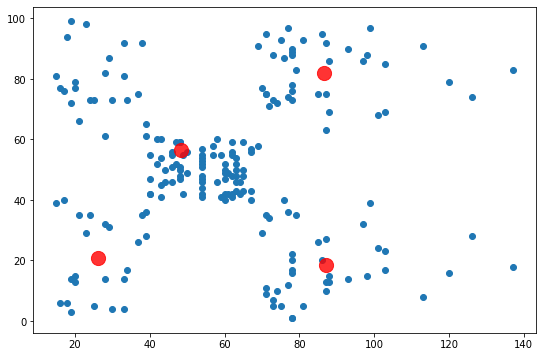

In [49]:
# Let's plot it 
plt.figure(figsize = (9,6))
plt.scatter(demo.iloc[:,0],demo.iloc[:,1])
plt.scatter(centers[:,0],centers[:,1],color = 'red', s = 200, alpha = .8)
plt.show()

In [56]:
# Now that we have the clusters what if i choose the value of K to be 1,2,3 or so on so what decides the best values of K
# That is done by evaluating the inertia / error

### InertiaIn K-means clustering, the sum of squares of distances (often referred to as "inertia" or "within-cluster sum of squares") is used as an internal evaluation metric to assess the quality of clustering. The objective of the K-means algorithm is to minimize this sum of squares.

A lower sum of squares indicates that the data points are closer to their cluster centroids, implying tighter and more compact clusters. However, a lower sum of squares alone doesn't guarantee that you have good or optimal clusters. It's essential to consider a few things:

1. **Varying Number of Clusters (K)**: The sum of squares tends to decrease as the number of clusters increases. However, it doesn't mean that more clusters are better. You'll need to use additional techniques (like the elbow method or silhouette score) to determine the optimal number of clusters.

2. **Cluster Separation**: Simply minimizing the sum of squares doesn't guarantee meaningful or well-separated clusters. Assessing how distinct the clusters are from each other is crucial for the quality of clustering.

3. **Domain Knowledge**: Always consider the context of your problem. Sometimes, the "right" number of clusters might not be purely based on statistical measures. Understanding the domain can help in interpreting the clusters better.

4. **Robustness**: Check the robustness of the clustering results. Re-running the algorithm with different initializations and verifying the consistency of the clusters is important.

5. **Use of Additional Metrics**: While the sum of squares is an essential measure, combining it with other evaluation metrics like silhouette score, Davies-Bouldin index, or visual inspection can provide a more comprehensive assessment of the clustering quality.

In summary, while a lower sum of squares is desirable and indicative of compact clusters, it's not the sole factor in determining whether the clusters are "good". Using a combination of evaluation metrics and domain knowledge will help in making a more informed judgment about the quality of the clusters.


In [57]:
# let's calculate the inertia of our modle with k = 4
kmeans.inertia_

73679.78903948834

In [61]:
k_values = range(2,21)
inertia_values = []
for i in k_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(demo)
    inertia=kmeans.inertia_
    inertia_values.append(inertia)

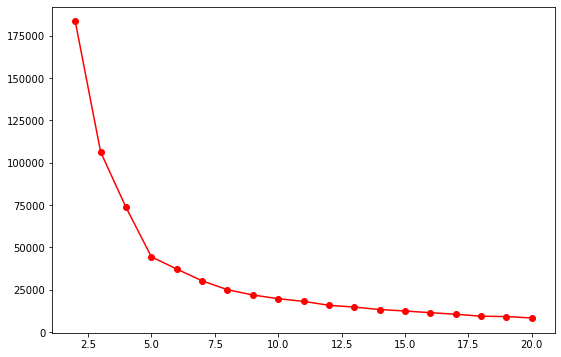

In [67]:
plt.figure(figsize = (9,6))
plt.plot(k_values,inertia_values,marker = 'o',color = 'red')
plt.show()

In [68]:
# so we will choose the value of k = 5 as there is a significant drop at k = 5

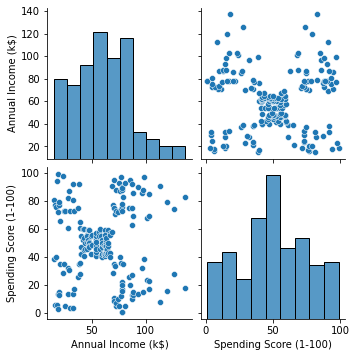

In [70]:
sns.pairplot(demo)

In [71]:
# So we have outlier 
demo.skew()

Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

The annual income is a bit right skewed 

In [82]:
demo['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [ ]:
# the spending score is a bit left skewed

In [81]:
demo['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

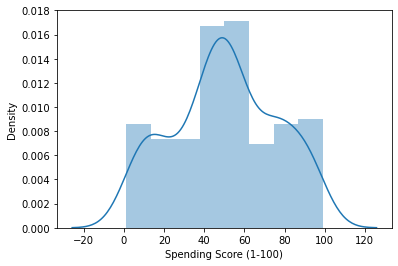

In [77]:
sns.distplot(demo['Spending Score (1-100)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

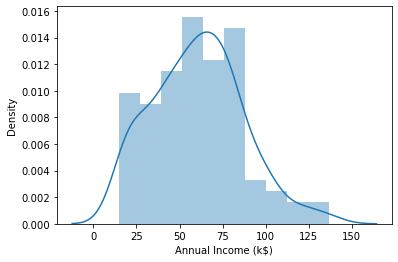

In [79]:
sns.distplot(demo['Annual Income (k$)'])

let's do a power transformation